In [2]:
cd ..

/cellar/users/agross/TCGA_Code/Methlation


In [3]:
import NotebookImport
from Setup.Imports import *

importing IPython notebook from Setup/Imports

Populating the interactive namespace from numpy and matplotlib


In [4]:
from Setup.MethylationAgeModels import *

importing IPython notebook from Setup/MethylationAgeModels

In [5]:
f = '/cellar/users/agross/GSE56046_methylome_normalized.txt'

In [6]:
dummy = pd.read_table(f, nrows=1, index_col=0)
cols = [c for c in dummy.columns if 'detectionPval' in c]
cols = [dummy.index.name] + cols
p_vals = pd.read_table(f, index_col=0, usecols=cols)
p_vals.columns = p_vals.columns.map(lambda s: s.split('.')[0])
p_vals = p_vals.replace(0, nan).stack()

In [7]:
cols = [c for c in dummy.columns if 'Mvalue' in c]
cols = [dummy.index.name] + cols
m_vals = pd.read_table(f, index_col=0, usecols=cols)
m_vals.columns = m_vals.columns.map(lambda s: s.split('.')[0])

In [8]:
m_2 = 2**m_vals
b_vals = m_2 / (m_2 + 1)

In [9]:
pred = run_hannum_model(b_vals)
pred2 = run_horvath_model(b_vals)

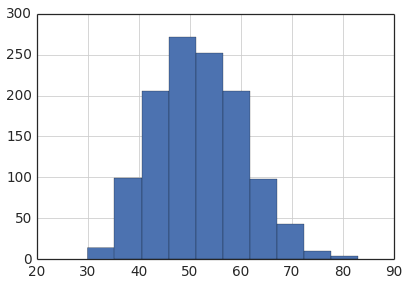

In [10]:
pred.hist()

In [11]:
tab = pd.read_csv('/cellar/users/agross/GSE56046_series_matrix.csv', header=None,
                 index_col=0)
#tab = tab.dropna()

In [20]:
desc = tab.T.describe()
tab = tab.ix[desc.ix['unique'] > 1]
age = tab.iloc[4].map(lambda s: s.split()[-1])
age = age.astype(int)
age.name = 'age'
tab.columns = tab.ix['!Sample_title'].map(lambda s: s.split('_')[0])

In [39]:
tab.ix['!Sample_title'].map(lambda s: s.split('_')[2]).value_counts()

CD14 [methylation]    1023
dtype: int64

In [24]:
pred_adj = detrend(age,pred)
pred2_adj = detrend(age, pred2)
pred_c = (pred_adj + pred2_adj) / 2
pred_c = detrend(age, pred_c)

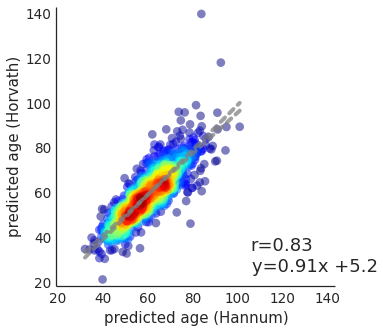

In [25]:
plot_regression(pred_adj, pred2_adj, density=True)

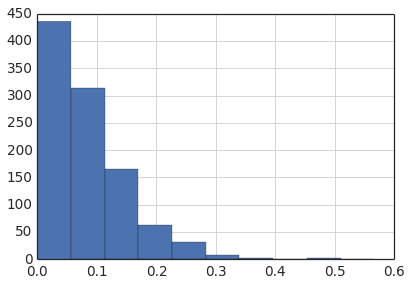

In [26]:
diff = ((pred_adj - pred2_adj) / ((pred_adj + pred2_adj) * .5)).abs()
diff.hist()

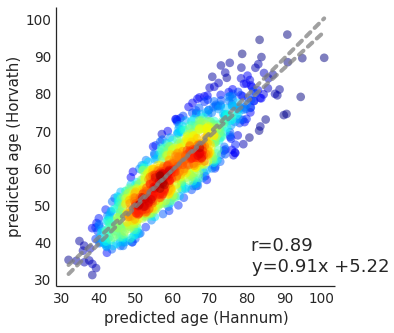

In [27]:
plot_regression(pred_adj, pred2_adj.ix[ti(diff < .2)], density=True)

In [28]:
k = ti(diff < .2)
pred_adj = detrend(age.ix[k],pred)
pred2_adj = detrend(age.ix[k], pred2)
pred_c = (pred_adj + pred2_adj) / 2
pred_c = detrend(age, pred_c)

In [42]:
pred_c.name = 'methylation age'

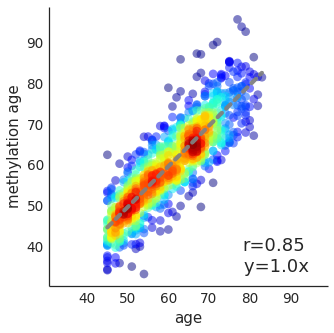

In [43]:
plot_regression(age, pred_c, density=True)